
# Marc White 

# Capstone part 2, due 11/15/17

# - Articulates the main goal of your project
Predicting the future price of the currencies

# - Outlines your proposed methods and models
Download historical data from Coinmarketcap, Bittrex, Coinbase any other exchanges
Monitor for trending bitcoin stories.


# - Defines the risks & assumptions of your data 
Risks: The Cryptocurrency market appears to be a bubble. 
Predictions must be based on 'the internet' (reddit & twitter) and will be sort term.


# - Revises initial goals & success criteria, as needed


# - Performs & summarizes the EDA of your data

Below. I will need 

Questions:

How does the price fluctuations of currencies correlate with each other?

Seasonal trend in the price fluctuations

Factors affecting the price.

Directional prediction of coin.

Actual price prediction.



Notes: 


http://blog.bradlucas.com/posts/2017-07-01-coin-market-cap/

https://www.reddit.com/r/Bitcoin/comments/7cp1jp/my_cryptocurrency_app_is_starting_to_look_good_d/#bottom-comments

https://www.reddit.com/r/Bitcoin/comments/3v9w8q/content_analysis_of_reddit_comments_to_identify/

https://projects.fivethirtyeight.com/reddit-ngram/?keyword=ethereum.bitcoin&start=20071015&end=20170731&smoothing=10


There are crypto gambling sites...
https://bitroll.com/bitcoin-dice-guide/bitcoin-dice-101/

# Imports

In [451]:
import requests
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist




%matplotlib inline

# Connect to coinmarketcap.com and make ticker object

In [452]:
response_object = requests.get('https://api.coinmarketcap.com/v1/ticker/?limit=0')

# Optional parameters:
# (int) start - return results from rank [start] and above
# (int) limit - return a maximum of [limit] results (default is 100, use 0 to return all results)
# (string) convert - return price, 24h volume, and market cap in terms of another currency. Valid values are: 
# "AUD", "BRL", "CAD", "CHF", "CLP", "CNY", "CZK", "DKK", "EUR", "GBP", "HKD", "HUF", "IDR", "ILS", "INR", "JPY",
# "KRW", "MXN", "MYR", "NOK", "NZD", "PHP", "PKR", "PLN", "RUB", "SEK", "SGD", "THB", "TRY", "TWD", "ZAR"

# example:
# ?convert=EUR&limit=10

In [453]:
# Check for successful connection
response_object.status_code

200

In [454]:
response6 = json.loads(response_object.content)

In [455]:
# First, check number of cryptocurrencies
print(len(response), len(response2), len(response3), len(response4), len(response5), len(response6))

1276 1278 1278 1278 1278 1278


# Make DataFrame of ticker

In [456]:
df = pd.DataFrame(response4)

In [457]:
df.dtypes

24h_volume_usd        object
available_supply      object
id                    object
last_updated          object
market_cap_usd        object
max_supply            object
name                  object
percent_change_1h     object
percent_change_24h    object
percent_change_7d     object
price_btc             object
price_usd             object
rank                  object
symbol                object
total_supply          object
dtype: object

# Fill nulls and convert object types

In [458]:
df.isnull().sum()

24h_volume_usd          83
available_supply       289
id                       0
last_updated             1
market_cap_usd         289
max_supply            1077
name                     0
percent_change_1h       86
percent_change_24h      98
percent_change_7d       78
price_btc                1
price_usd                1
rank                     0
symbol                   0
total_supply           125
dtype: int64

In [459]:
df.head(100)

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,6751740000.0,16677800.0,bitcoin,1510596551,106787286288,21000000.0,Bitcoin,-1.23,3.88,-11.15,1.0,6402.96,1,BTC,16677800.0
1,1221700000.0,95704658.0,ethereum,1510596550,29987332047.0,None,Ethereum,-0.22,-0.73,3.73,0.0493929,313.332,2,ETH,95704658.0
2,4979690000.0,16800313.0,bitcoin-cash,1510596563,23672144322.0,21000000.0,Bitcoin Cash,9.64,2.15,125.27,0.222116,1409.03,3,BCH,16800313.0
3,145852000.0,38531538922.0,ripple,1510596541,7761985858.0,100000000000,Ripple,-0.24,-0.3,-2.64,0.00003176,0.201445,4,XRP,99993667738.0
4,433898000.0,7686385.0,dash,1510596546,3274407789.0,18900000.0,Dash,-0.3,-0.32,53.57,0.0671537,426.001,5,DASH,7686385.0
5,281607000.0,53813382.0,litecoin,1510596541,3259137546.0,84000000.0,Litecoin,-0.4,1.25,8.81,0.0095471,60.5637,6,LTC,53813382.0
6,126436000.0,15345839.0,monero,1510596543,1892985955.0,None,Monero,-0.49,-2.01,28.53,0.0194454,123.355,7,XMR,15345839.0
7,44824900.0,65000000.0,neo,1510596553,1817289500.0,None,NEO,-0.37,1.65,6.03,0.00440728,27.9583,8,NEO,100000000.0
8,8519500.0,8999999999.0,nem,1510596546,1681227000.0,None,NEM,-1.2,2.25,2.06,0.00002945,0.186803,9,XEM,8999999999.0
9,37477000.0,2779530283.0,iota,1510596561,1658879264.0,2779530283.0,IOTA,-0.8,2.17,63.83,0.00009408,0.59682,10,MIOTA,2779530283.0


In [460]:
df.fillna(0, inplace=True)

In [461]:
df.isnull().sum()

24h_volume_usd        0
available_supply      0
id                    0
last_updated          0
market_cap_usd        0
max_supply            0
name                  0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
price_btc             0
price_usd             0
rank                  0
symbol                0
total_supply          0
dtype: int64

In [462]:
df.dtypes

24h_volume_usd        object
available_supply      object
id                    object
last_updated          object
market_cap_usd        object
max_supply            object
name                  object
percent_change_1h     object
percent_change_24h    object
percent_change_7d     object
price_btc             object
price_usd             object
rank                  object
symbol                object
total_supply          object
dtype: object

In [463]:
df.describe()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
count,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278
unique,1193,961,1278,116,989,120,1276,551,967,1118,867,1179,1278,1257,988
top,0,0,futcoin,1510596570,0,0,Enigma,-1.3,0,0,0.00000001,0.0000634367,1263,BAT,0
freq,83,289,1,47,289,1077,2,168,98,78,36,21,1,2,125


# Create a dataframe for identity data and a dataframe for numerical data

In [2]:
# adjust search criteria here

In [464]:
ident = pd.DataFrame(df[['id', 'name', 'rank', 'symbol']])

stats = pd.DataFrame(df[:].head(125)[['24h_volume_usd', 'market_cap_usd', 
                                      'percent_change_7d', 'price_usd']].astype(float))

supply = pd.DataFrame(df[:][['available_supply', 'max_supply', 'total_supply']].astype(float))
                      
# '24h_volume_usd', 'available_supply', 'id', 'last_updated', 'market_cap_usd', 'max_supply', 'name',
# 'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd', 'rank',
# 'symbol', 'total_supply'

In [465]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
24h_volume_usd       125 non-null float64
market_cap_usd       125 non-null float64
percent_change_7d    125 non-null float64
price_usd            125 non-null float64
dtypes: float64(4)
memory usage: 4.0 KB


In [466]:
stats.describe()

,24h_volume_usd,market_cap_usd,percent_change_7d,price_usd
count,1.250000e+02,1.250000e+02,125.000000,125.000000
mean,1.271031e+08,1.598979e+09,9.324720,81.827692
std,7.569335e+08,1.009856e+10,28.679578,586.513968
min,9.955080e+03,2.992684e+07,-33.550000,0.000055
25%,4.562980e+05,4.848883e+07,-4.820000,0.192716
50%,2.020460e+06,9.393099e+07,4.520000,0.926099
75%,5.109240e+06,1.951352e+08,12.860000,6.010650
max,6.751740e+09,1.067873e+11,208.250000,6402.960000


In [467]:
#df['over50k'] = df['income_dummy'].apply(lambda x: 1 if x == ' >50K' else 0)

#corr_df = df[['rank', 'percent_change_24h', 'price_btc']].corr()

corr_df = stats.corr()

In [468]:
corr_stats = stats[['24h_volume_usd', 'market_cap_usd', 
                                      'percent_change_7d', 'price_usd']].corr()


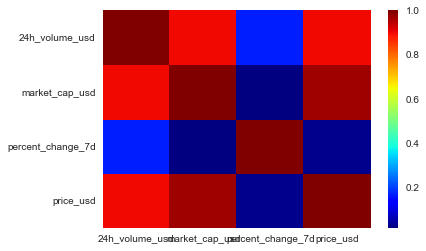

In [469]:
sns.heatmap(corr_stats, cmap='jet')

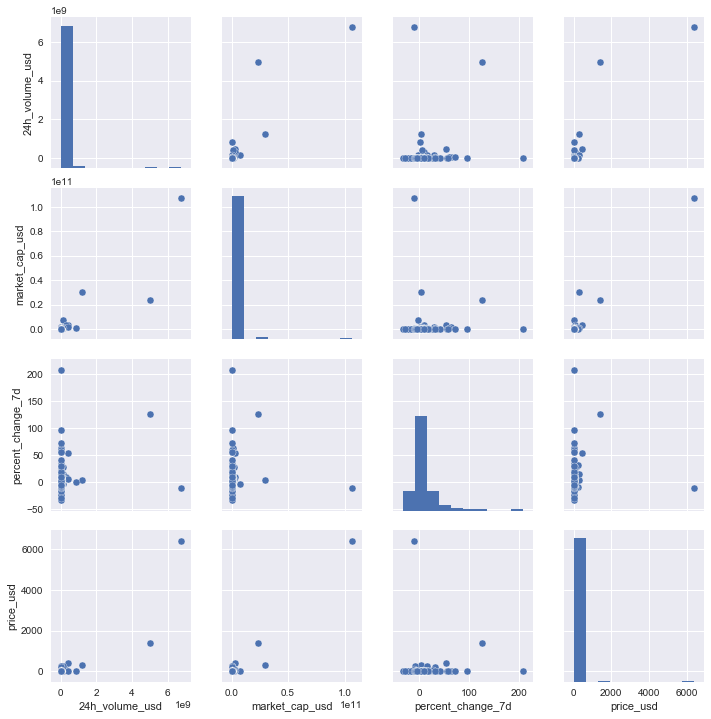

In [470]:
sns.pairplot(data=stats)

# Preprocessing

In [471]:
stats.shape

(125, 4)

In [472]:
target = stats.price_usd.values

In [473]:
X = stats[['24h_volume_usd', 'market_cap_usd', 'percent_change_7d', 'price_usd']]  
y = target

In [474]:
# Robust Scalar
rs = RobustScaler()
X = rs.fit_transform(X)

In [352]:
# Standard Scalar
ss = StandardScaler
X = rs.fit_transform(X)

In [475]:
# train-test split cross-validation / grid searching for hyperparameters.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.75)

# Agglomerative Clustering: Hierarchical clustering (bottom-up)

In [476]:
stats.head()

,24h_volume_usd,market_cap_usd,percent_change_7d,price_usd
0,6.751740e+09,1.067873e+11,-11.15,6402.960000
1,1.221700e+09,2.998733e+10,3.73,313.332000
2,4.979690e+09,2.367214e+10,125.27,1409.030000
3,1.458520e+08,7.761986e+09,-2.64,0.201445
4,4.338980e+08,3.274408e+09,53.57,426.001000


0.959042602826


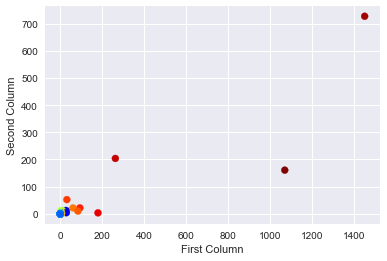

In [477]:
Z = linkage(X, 'ward')

c, coph_dists = cophenet(Z, pdist(X))
print(c)

max_dist = 3
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

plt.scatter(X[:,0], X[:,1], c=clusters, cmap='jet')
plt.xlabel('First Column')
plt.ylabel('Second Column')
plt.show()

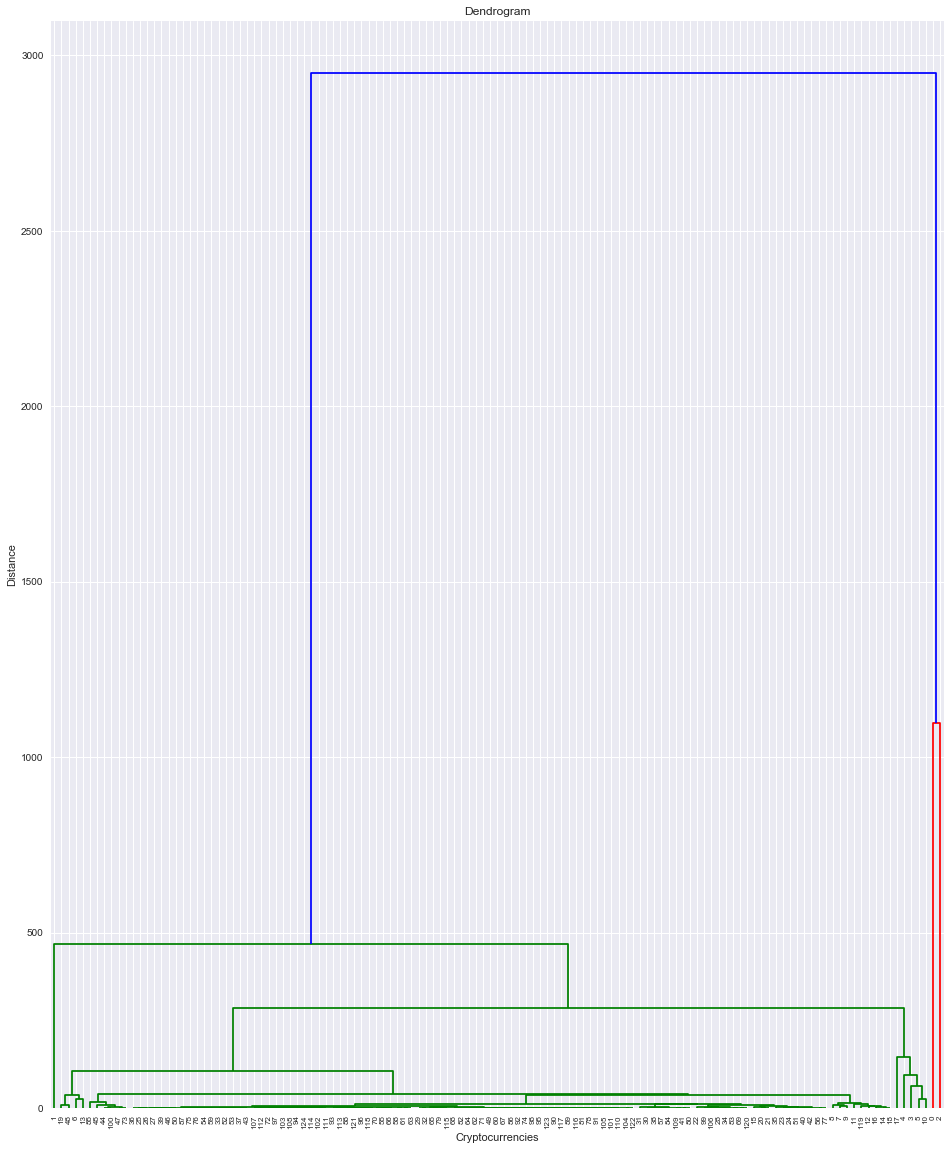

In [478]:
plt.figure(figsize=(16,20))
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

# KMeans

In [448]:
# 2 Clusters
k_mean = KMeans(n_clusters=4)
k_mean.fit(X)

# Labels and centroids for 8 Clusters
labels = k_mean.labels_
print(labels)
clusters = k_mean.cluster_centers_
clusters



silhouette_score(X, labels)


[2 3 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.91144980653155849

In [ ]:
# visually examine the clusters that have been created

sns.pairplot(data=labels)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# DBSCAN